In [57]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import cdist
from plotDecBoundaries import plotDecBoundaries

In [58]:
def openFile(dataset):
    #Open the csv file and store it in a list
    with open(dataset,"r") as Feat_Train: 
        Feat_Train_Reader = csv.reader(Feat_Train, delimiter=',')
        FeatureList = []
        for row in Feat_Train_Reader:
            if len (row) != 0:
                FeatureList = FeatureList +[row] 
    Feat_Train.close()
    return FeatureList


#Making a copy of the training data list with just the training data and no labels 
def just_data(FeatureList):
    Data = []
    for row in FeatureList: 
        Data.append((row[:-1]))
    #print(Data)
    
    only_data = np.array(Data[1:]).astype("float") 
    return only_data

def class_labels(FeatureList):
    #Make a list containing the class labels 
    Class = []
    for row in FeatureList: 
        Class.append((row[-1]))
     
    labels = np.array(Class[1:]).astype("float")
    
    Class1 = copy.deepcopy(Class)
    Class2 = copy.deepcopy(Class)
    Class3 = copy.deepcopy(Class)
        
    label_one = np.array(Class1[1:]).astype("float")    #label for class 1 with class 2+3
    label_two = np.array(Class2[1:]).astype("float")    #label for class 2 with class 1+3
    label_three = np.array(Class3[1:]).astype("float")  #label for class 3 with class 1+2

    #keeping labels only 1,2 for the binary classifier
    
    label_one[label_one == 3] = 2
    label_two[label_two == 3] = 1
    label_three[label_three == 2] = 1
    label_three[label_three == 3] = 2
    
    return labels, label_one, label_two, label_three

def mean_3class(FeatureList):
#Calculate the mean 
    FeatureList1 = []
    FeatureList2 = []
    FeatureList3 = []

    #Divide the training data into three separate lists based on their class 
    #print(FeatureList[-1])
    for i in FeatureList[1:]:
        #print(i)
        if float(i[-1]) == 1:
            FeatureList1.append(i)
        elif float(i[-1]) == 2:
            FeatureList2.append(i)
        else:
            FeatureList3.append(i)
    Sum1 = 0
    Sum2 = 0
    Sum3 = 0
    Sum4 = 0
    Sum5 = 0
    Sum6 = 0
    count1 = 0
    count2 = 0
    count3 = 0

    for i in FeatureList1:
        #print(i)
        Sum1 = Sum1 + float(i[0]) 
        Sum2 = Sum2 + float(i[1]) 
        count1 = count1 + 1
    
    for i in FeatureList2:
        Sum3 = Sum3 + float(i[0]) 
        Sum4 = Sum4 + float(i[1]) 
        count2 = count2 + 1
        
    for i in FeatureList3:
        Sum5 = Sum5 + float(i[0]) 
        Sum6 = Sum6 + float(i[1]) 
        count3 = count3 + 1
    
    Mean1 = Sum1/count1 
    Mean2 = Sum2/count1 
    Mean3 = Sum3/count2 
    Mean4 = Sum4/count2
    Mean5 = Sum5/count3
    Mean6 = Sum6/count3
    
    
    Mean = [[Mean1,Mean2],[Mean3,Mean4], [Mean5, Mean6]]   
    #print(Mean)
    classes_mean = np.array(Mean).astype("float") 
    Sum1_3 = Sum1 + Sum3   #Class 1 + 2 X value
    Sum2_4 = Sum2 + Sum4   #Class 1 + 2 Y value
    
    Sum3_5 = Sum5 + Sum3  #class 2 + 3 X value
    Sum4_6 = Sum4 + Sum6  #class 2 + 3 Y value
    
    Sum1_5 = Sum1 + Sum5  #class 1+ 3 X value
    Sum2_6 = Sum2 + Sum6  #class 1+ 3 Y value
    
    Mean1_3 = Sum1_3/(count1+count2)
    Mean2_4 = Sum2_4/(count1+count2)
    
    Mean3_5 = Sum3_5/(count2+count3)
    Mean4_6 = Sum4_6/(count2+count3)
    
    Mean1_5 = Sum1_5/(count1+count3)
    Mean2_6 = Sum2_6/(count1+count3)
    
    
    Means1 = [[Mean1,Mean2],[Mean3_5,Mean4_6]]  #class 1 and class(2+3)
    mean1_1c= np.array(Means1).astype("float")
    
    # Means2 = [[Mean3,Mean4],[Mean1_5,Mean2_6]]  #class 2 and class(1+3)
    Means2 = [[Mean1_5,Mean2_6],[Mean3,Mean4]] 
    mean2_2c = np.array(Means2).astype("float")
    
    Means3 = [[Mean1_3,Mean2_4],[Mean5,Mean6]]   #class 3 and class(1+2)
    mean3_3c = np.array(Means3).astype("float")
    
    
    #class 1, class 2, class 3, class(1+2),  class(1+3), class(2+3) 
    MeanFinal = [[Mean1,Mean2],[Mean3,Mean4], [Mean5,Mean6], [Mean1_3,Mean2_4],[Mean1_5,Mean2_6], [Mean3_5,Mean4_6]] 
    return MeanFinal, classes_mean, mean1_1c, mean2_2c, mean3_3c
  
     
def ovr(MeanFinal, FeatureList):    #Part A
    
    Mean1 = MeanFinal[0][0]
    Mean2 = MeanFinal[0][1]
    Mean3 = MeanFinal[1][0]
    Mean4 = MeanFinal[1][1]
    Mean5 = MeanFinal[2][0]
    Mean6 = MeanFinal[2][1]
    Mean13 = MeanFinal[3][0]
    Mean24 = MeanFinal[3][1]
    Mean15 = MeanFinal[4][0]
    Mean26 = MeanFinal[4][1]
    Mean35 = MeanFinal[5][0]
    Mean46 = MeanFinal[5][1]


    #print(np.shape(FeatureList))
    listy = []  # Initialize listy outside of the loop #This will store 
    
    for i in FeatureList[1:]:
        #print(i)
        current = []  # List to hold classification results for the current element
    
        if math.sqrt((Mean1 - float(i[0]))**2 + (Mean2 - float(i[1]))**2) < math.sqrt((Mean35 - float(i[0]))**2 + (Mean46 - float(i[1]))**2):
            current.append(1)   #closer to class 1 than 2+3
        else:
            current.append(-1)  
    
        if math.sqrt((Mean3 - float(i[0]))**2 + (Mean4 - float(i[1]))**2) < math.sqrt((Mean15 - float(i[0]))**2 + (Mean26 - float(i[1]))**2):
            current.append(2)  #closer to class 2 than 1+3
        else:
            current.append(-2)
         
    
        if math.sqrt((Mean5 - float(i[0]))**2 + (Mean6 - float(i[1]))**2) < math.sqrt((Mean13 - float(i[0]))**2 + (Mean24 - float(i[1]))**2):
            current.append(3)  #closer to class 3 than 1+2
        else:
            current.append(-3)
    
        listy.append(current)  # Append the classification results for the current element to listy
        #print(i[0], i[1], current)
    #print(len(listy))
    print(np.shape(listy))

    for j in range(len(listy)):
        count1 = 0
        count2 = 0
        for i in listy[j]:
            if i < 0:    #-ve case
                count1 += 1
            if i > 0:     #+ve case
                count2 += 1
        # print(count1, count2)
    
        if count2 > 1 or count1 > 2:  # more than one value is positive #more than 2 -ve values
            FeatureList[j+1].append('0') # unclassified
        # elif count1 > 2:  # more than two negative values
            # FeatureList[j+1].append('0')
        else:
            for i in listy[j]:
                if i == 1:
                    FeatureList[j+1].append('1.0')
                elif i == 2:
                    FeatureList[j+1].append('2.0')
                elif i == 3:
                    FeatureList[j+1].append('3.0')

        
    #print(type(FeatureList)) 

    return FeatureList


def unclassified_decision1(FeatureList, classes_mean):    #part b
    
    Mean1 = classes_mean[0][0]
    Mean2 = classes_mean[0][1]
    Mean3 = classes_mean[1][0]
    Mean4 = classes_mean[1][1]
    Mean5 = classes_mean[2][0]
    Mean6 = classes_mean[2][1]
    
    for i in FeatureList[1:]:
        if i[-1] == '0':
            dist_to_mean1 = math.sqrt((Mean1 - float(i[0]))**2 + (Mean2 - float(i[1]))**2)
            dist_to_mean2 = math.sqrt((Mean3 - float(i[0]))**2 + (Mean4 - float(i[1]))**2)
            dist_to_mean3 = math.sqrt((Mean5 - float(i[0]))**2 + (Mean6 - float(i[1]))**2)
    
            if dist_to_mean1 < dist_to_mean2 and dist_to_mean1 < dist_to_mean3:
                i[-1] = '1.0'  
            elif dist_to_mean2 < dist_to_mean1 and dist_to_mean2 < dist_to_mean3:
                i[-1] = '2.0'   
            else:
                i[-1] = '3.0'
    #print(FeatureList)
    return FeatureList


def nearestMeans(FeatureList, classes_mean):  #part c
    
    Mean1 = classes_mean[0][0]
    Mean2 = classes_mean[0][1]
    Mean3 = classes_mean[1][0]
    Mean4 = classes_mean[1][1]
    Mean5 = classes_mean[2][0]
    Mean6 = classes_mean[2][1]
    
    for i in FeatureList[1:]:
        
        dist_to_mean1 = math.sqrt((Mean1 - float(i[0]))**2 + (Mean2 - float(i[1]))**2)
        dist_to_mean2 = math.sqrt((Mean3 - float(i[0]))**2 + (Mean4 - float(i[1]))**2)
        dist_to_mean3 = math.sqrt((Mean5 - float(i[0]))**2 + (Mean6 - float(i[1]))**2)

        if dist_to_mean1 < dist_to_mean2 and dist_to_mean1 < dist_to_mean3:
            i[-1] = '1.0'  
        elif dist_to_mean2 < dist_to_mean1 and dist_to_mean2 < dist_to_mean3:
            i[-1] = '2.0'   
        else:
            i[-1] = '3.0'
    #print(FeatureList)
    return FeatureList
    
 
    
def calculate_error(FeatureList):
    Train_error = 0
    unclassified_count = 0
    Train_Error_Rate = 0
    for i in FeatureList[1:]:
        if i[-1] == '0':
            unclassified_count += 1
        elif i[-1] != i[-2]:
                Train_error += 1
     
    Error_Rate = (Train_error / (len(FeatureList) - 1)) * 100
    Unclassified_rate = unclassified_count/(len(FeatureList)-1) * 100
    Accuracy =  100 - (Error_Rate + Unclassified_rate)
    #print(Train_error)
    return Accuracy, Error_Rate, Unclassified_rate


In [59]:
def plotDecBoundaries_OVR(training, label_train, sample_mean, pred_label):  
    #passing predicted label that we have
    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    sample_mean_prime = [pred_label[5], pred_label[4], pred_label[3]]
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    dist_mat_prime = cdist(xy, sample_mean_prime)
    condition = dist_mat < dist_mat_prime
    pred_label = np.array([np.where(i == 1)[0][0] if sum(i) == 1 else 4 for i in condition ])
    
    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')
    #print(decisionmap)

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')    #let's keep this as is for now.
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')  #let's pass the mean of class1 , class2 
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')  #and class 3 as is. 
    if nclass == 3:
        m3, = plt.plot(sample_mean[2,0], sample_mean[2,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
    if nclass == 3:
        l1 = plt.legend([m1,m2,m3],['Class 1 Mean', 'Class 2 Mean', 'Class 3 Mean'], loc=4)
    else:
        l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)

    plt.show()
  

(150, 3)
Using default decision rule, Error_Rate: 14.000000000000002
Using default decision rule, Accuracy: 70.0
Using default decision rule, Unclassified_rate: 16.0


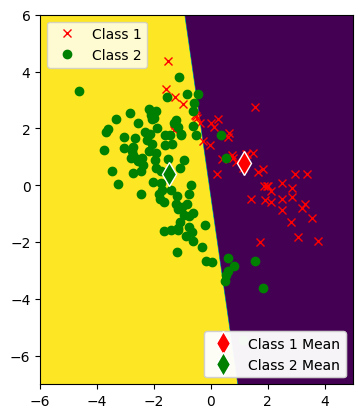

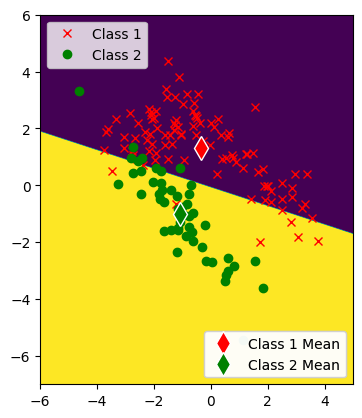

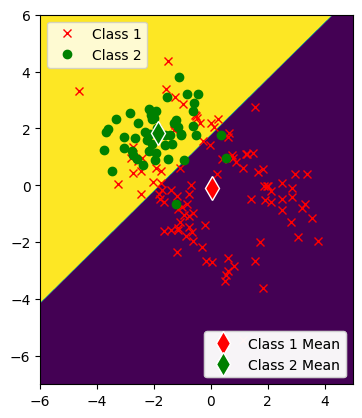

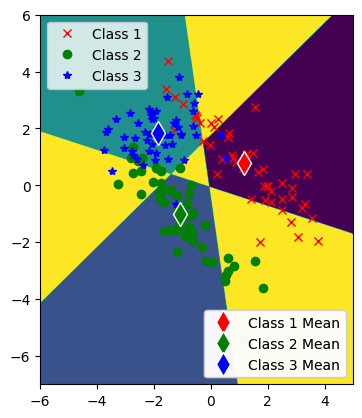

After applying decision rule on unclassified data, Error_Rate: 16.666666666666664
After applying decision rule on unclassified data, Accuracy: 83.33333333333334
After applying decision rule on unclassified data, Unclassified_rate: 0.0


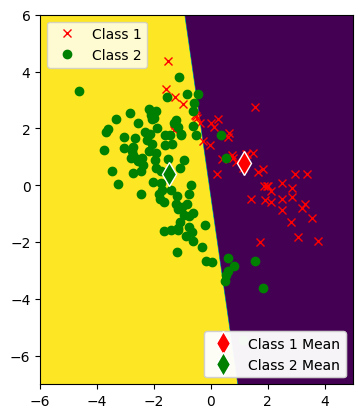

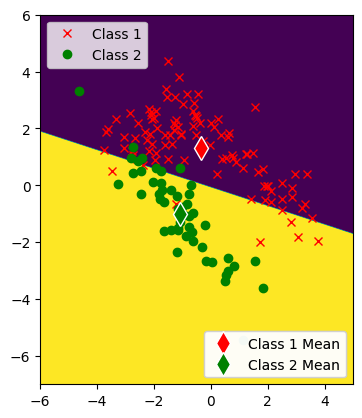

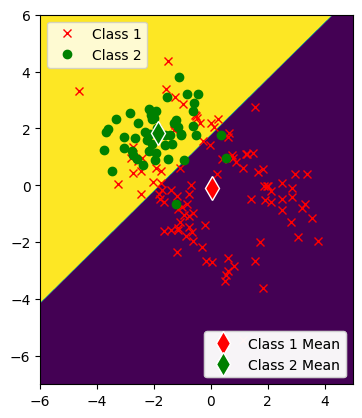

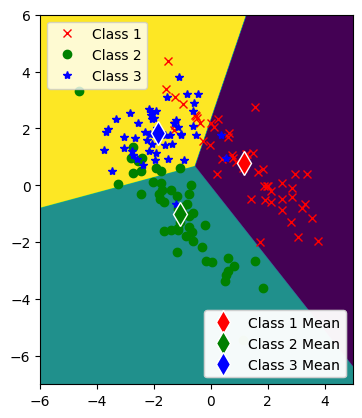

NearestMeansClassifier , Error_Rate: 16.666666666666664
NearestMeansClassifier, Accuracy: 83.33333333333334
NearestMeansClassifier, Unclassified_rate: 0.0


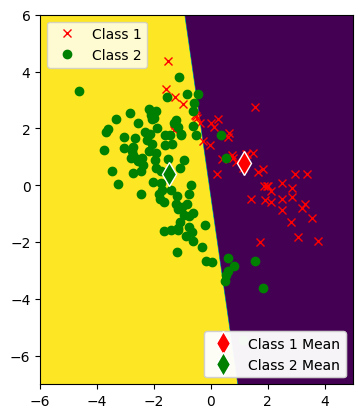

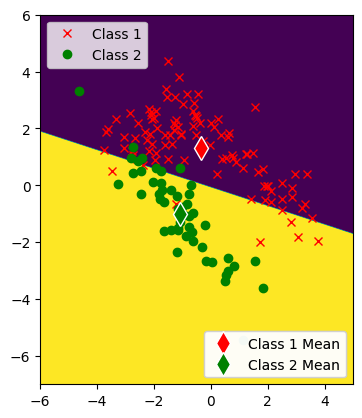

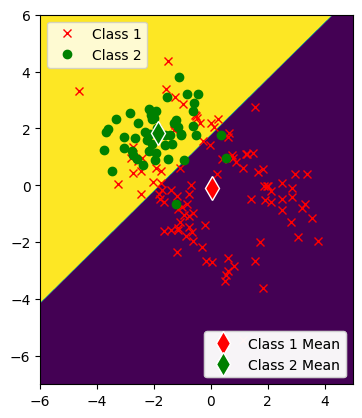

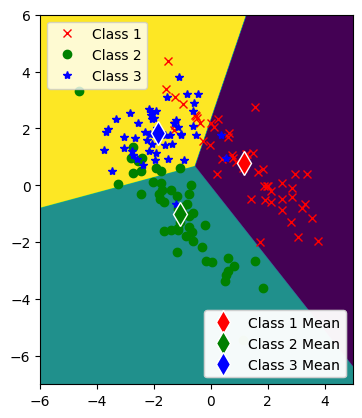

In [60]:
FeatureList = openFile("ee559_dataset/dataset4_train.csv")   #dataset4
only_data = just_data(FeatureList)
labels, label_one, label_two, label_three = class_labels(FeatureList)
MeanFinal, classes_mean, mean1_1c, mean2_2c, mean3_3c = mean_3class(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_4a, Error_Rate_4a, Unclassified_rate_4a = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_4a)
print("Using default decision rule, Accuracy:", Accuracy_4a)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_4a)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_4b, Error_Rate_4b, Unclassified_rate_4b = calculate_error(FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_4b)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_4b)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_4b)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)
 

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_4c, Error_Rate_4c, Unclassified_rate_4c = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_4c)
print("NearestMeansClassifier, Accuracy:", Accuracy_4c)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_4c)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


(150, 3)
Using default decision rule, Error_Rate: 10.0
Using default decision rule, Accuracy: 72.0
Using default decision rule, Unclassified_rate: 18.0


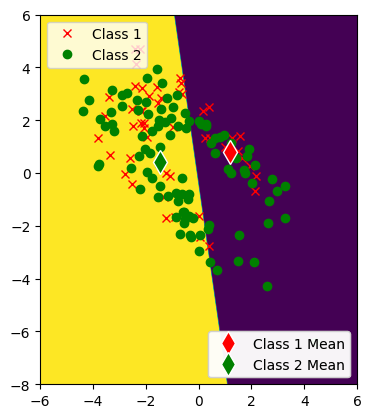

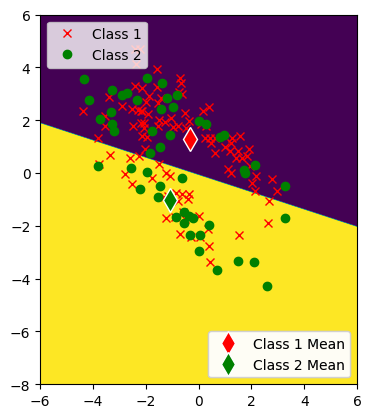

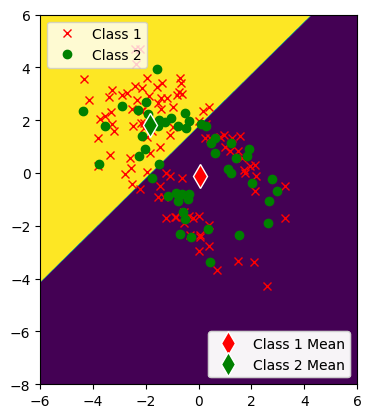

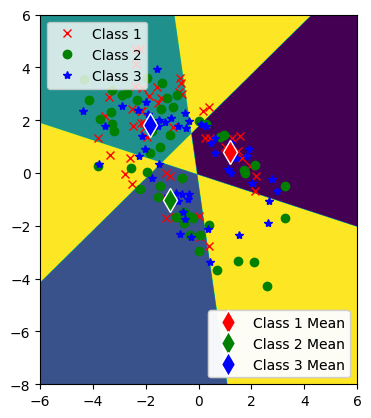

After applying decision rule on unclassified data, Error_Rate: 13.333333333333334
After applying decision rule on unclassified data, Accuracy: 86.66666666666667
After applying decision rule on unclassified data, Unclassified_rate: 0.0


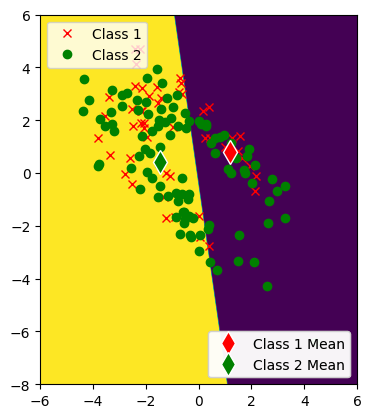

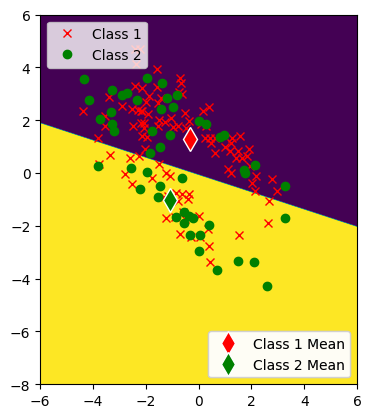

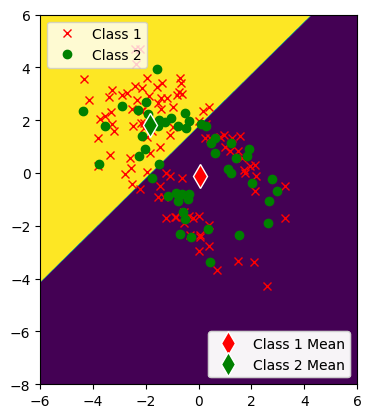

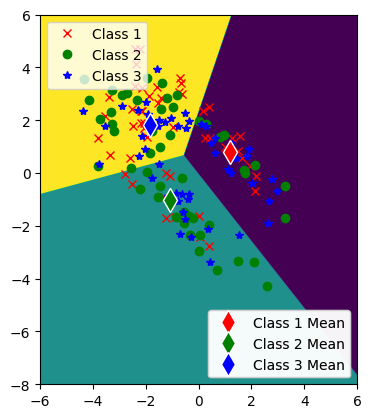

NearestMeansClassifier , Error_Rate: 13.333333333333334
NearestMeansClassifier, Accuracy: 86.66666666666667
NearestMeansClassifier, Unclassified_rate: 0.0


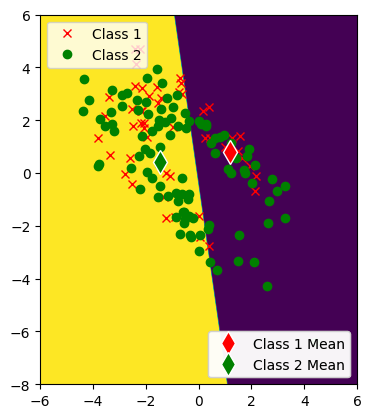

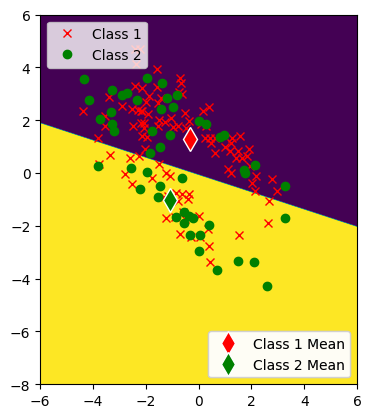

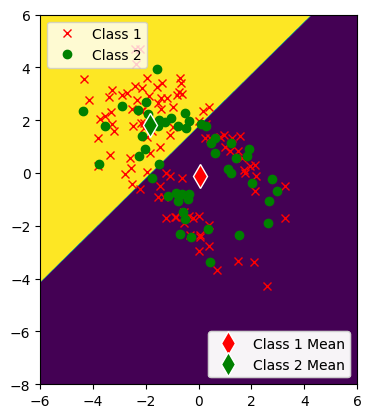

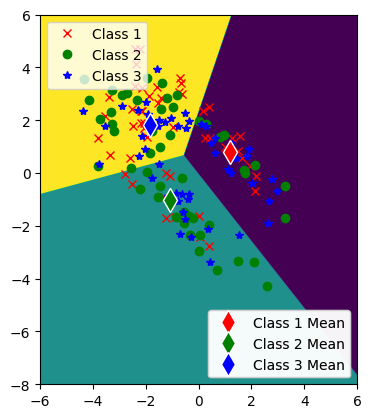

In [61]:
FeatureList = openFile("ee559_dataset/dataset4_test.csv")   #dataset 4-test
only_data = just_data(FeatureList)
#labels, label_one, label_two, label_three = class_labels(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_4aT, Error_Rate_4aT, Unclassified_rate_4aT = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_4aT)
print("Using default decision rule, Accuracy:", Accuracy_4aT)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_4aT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_4bT, Error_Rate_4bT, Unclassified_rate_4bT = calculate_error (FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_4bT)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_4bT)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_4bT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_4cT, Error_Rate_4cT, Unclassified_rate_4cT = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_4cT)
print("NearestMeansClassifier, Accuracy:", Accuracy_4cT)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_4cT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


(150, 3)
Using default decision rule, Error_Rate: 16.0
Using default decision rule, Accuracy: 53.333333333333336
Using default decision rule, Unclassified_rate: 30.666666666666664


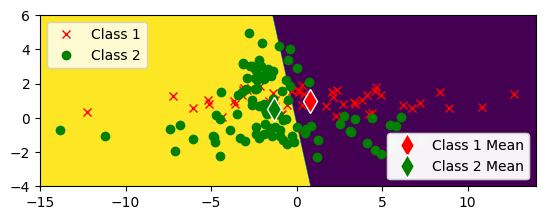

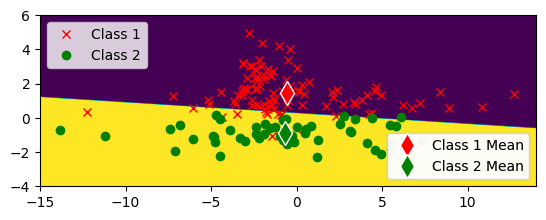

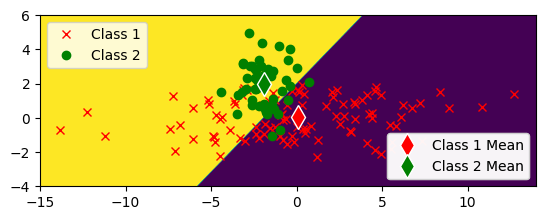

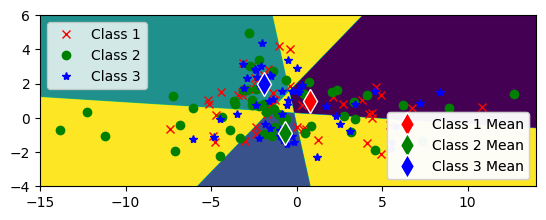

After applying decision rule on unclassified data, Error_Rate: 35.333333333333336
After applying decision rule on unclassified data, Accuracy: 64.66666666666666
After applying decision rule on unclassified data, Unclassified_rate: 0.0


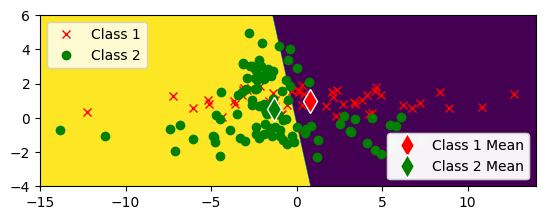

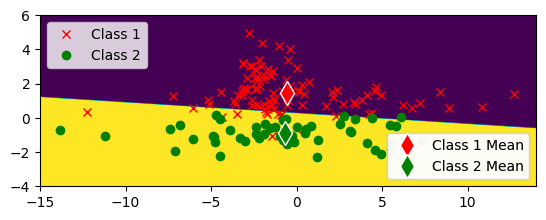

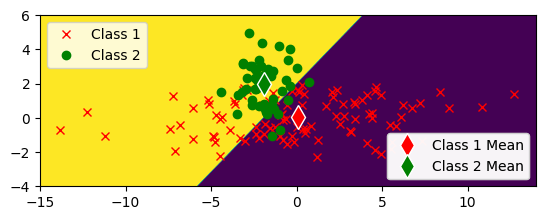

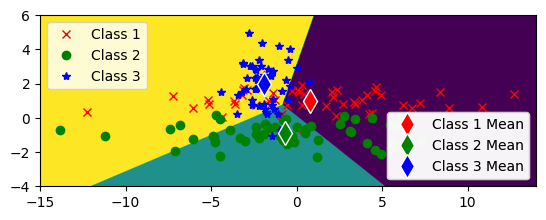

NearestMeansClassifier , Error_Rate: 35.333333333333336
NearestMeansClassifier, Accuracy: 64.66666666666666
NearestMeansClassifier, Unclassified_rate: 0.0


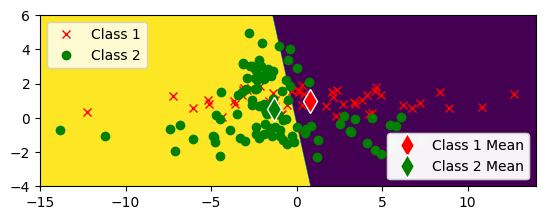

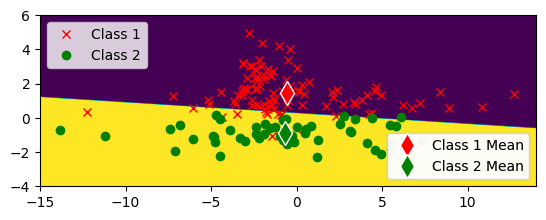

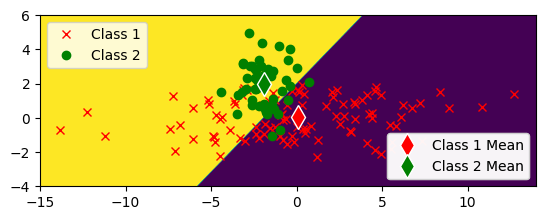

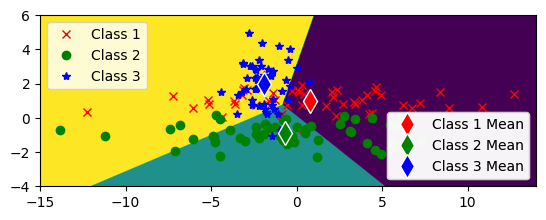

In [62]:
FeatureList = openFile("ee559_dataset/dataset5_train.csv")   #dataset5
only_data = just_data(FeatureList)
labels, label_one, label_two, label_three = class_labels(FeatureList)
MeanFinal, classes_mean, mean1_1c, mean2_2c, mean3_3c = mean_3class(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_5a, Error_Rate_5a, Unclassified_rate_5a = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_5a)
print("Using default decision rule, Accuracy:", Accuracy_5a)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_5a)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_5b, Error_Rate_5b, Unclassified_rate_5b = calculate_error(FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_5b)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_5b)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_5b)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)
 

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_5c, Error_Rate_5c, Unclassified_rate_5c = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_5c)
print("NearestMeansClassifier, Accuracy:", Accuracy_5c)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_5c)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


(150, 3)
Using default decision rule, Error_Rate: 6.0
Using default decision rule, Accuracy: 61.333333333333336
Using default decision rule, Unclassified_rate: 32.666666666666664


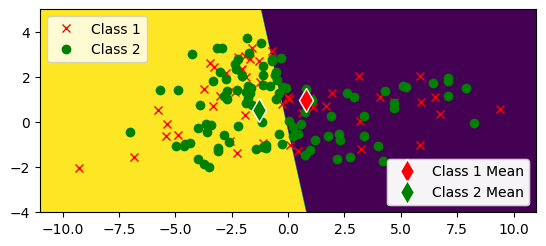

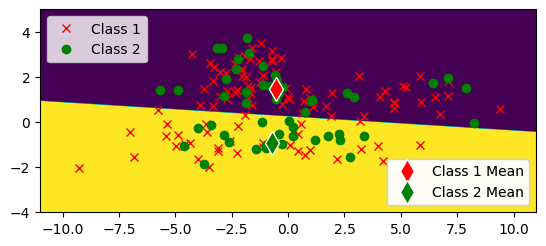

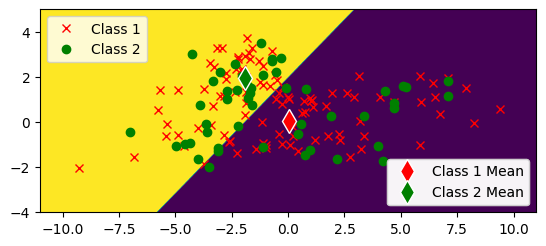

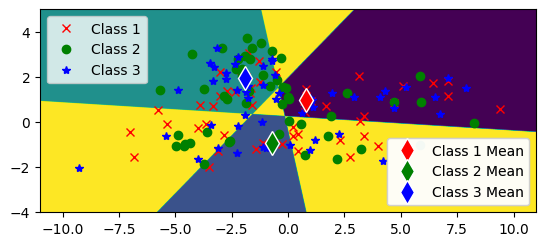

After applying decision rule on unclassified data, Error_Rate: 22.0
After applying decision rule on unclassified data, Accuracy: 78.0
After applying decision rule on unclassified data, Unclassified_rate: 0.0


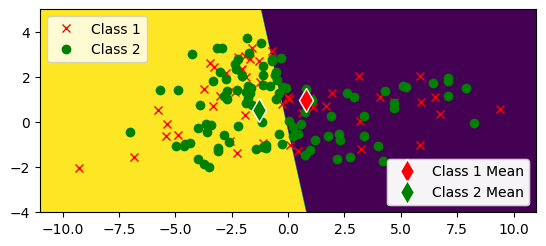

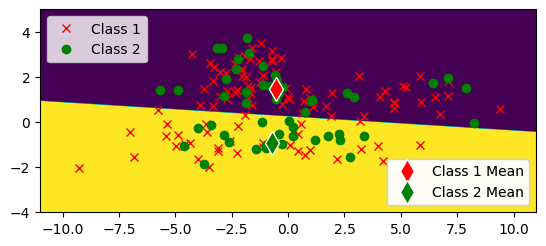

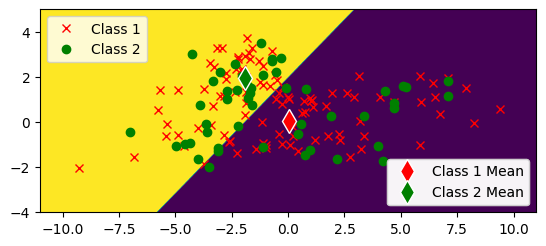

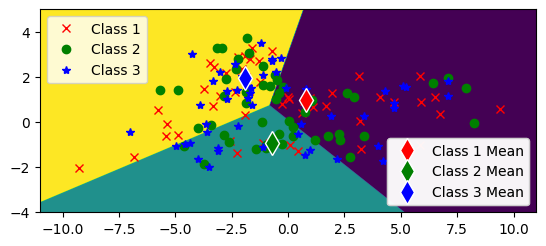

NearestMeansClassifier , Error_Rate: 22.0
NearestMeansClassifier, Accuracy: 78.0
NearestMeansClassifier, Unclassified_rate: 0.0


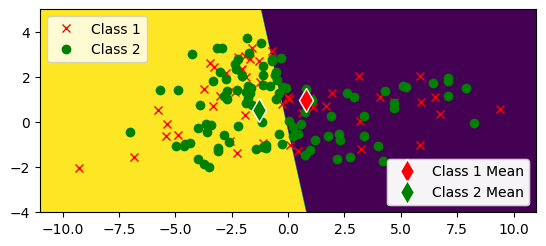

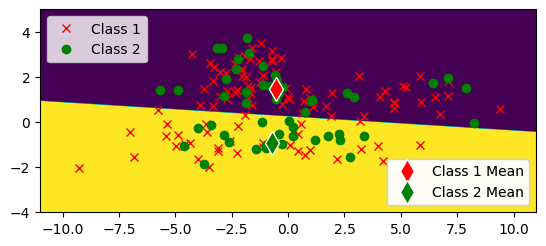

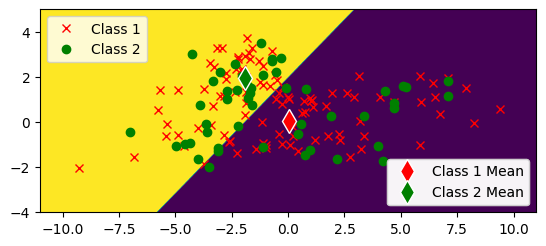

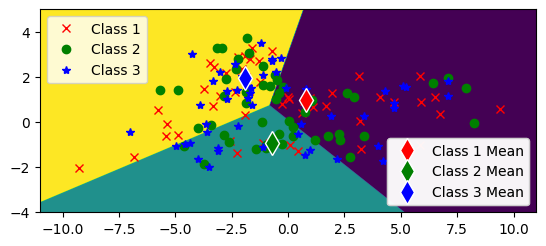

In [63]:
FeatureList = openFile("ee559_dataset/dataset5_test.csv")   #dataset 5-test
only_data = just_data(FeatureList)
#labels, label_one, label_two, label_three = class_labels(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_5aT, Error_Rate_5aT, Unclassified_rate_5aT = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_5aT)
print("Using default decision rule, Accuracy:", Accuracy_5aT)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_5aT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_5bT, Error_Rate_5bT, Unclassified_rate_5bT = calculate_error (FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_5bT)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_5bT)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_5bT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_5cT, Error_Rate_5cT, Unclassified_rate_5cT = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_5cT)
print("NearestMeansClassifier, Accuracy:", Accuracy_5cT)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_5cT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


(150, 3)
Using default decision rule, Error_Rate: 10.666666666666668
Using default decision rule, Accuracy: 58.0
Using default decision rule, Unclassified_rate: 31.333333333333336


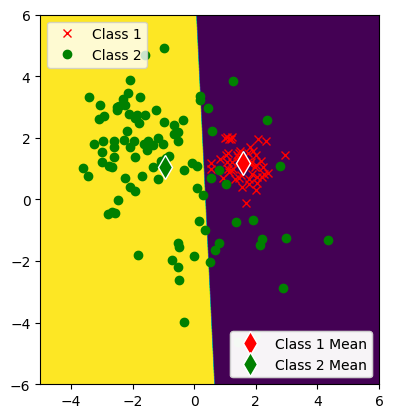

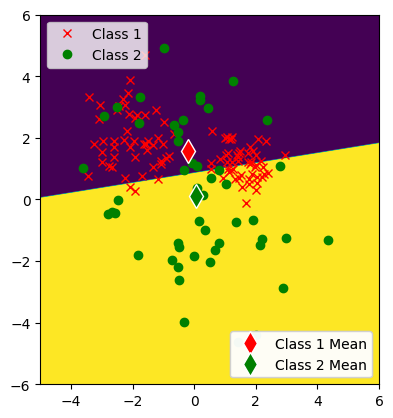

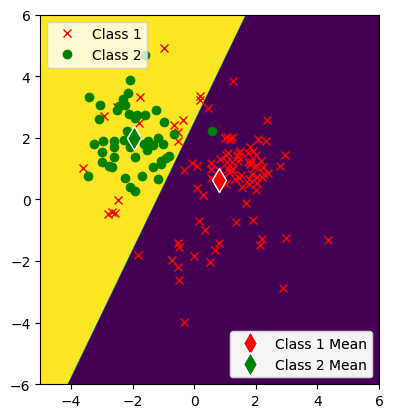

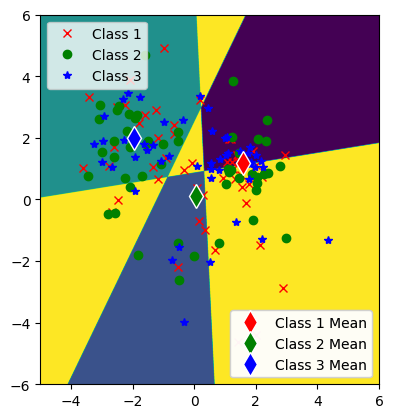

After applying decision rule on unclassified data, Error_Rate: 18.0
After applying decision rule on unclassified data, Accuracy: 82.0
After applying decision rule on unclassified data, Unclassified_rate: 0.0


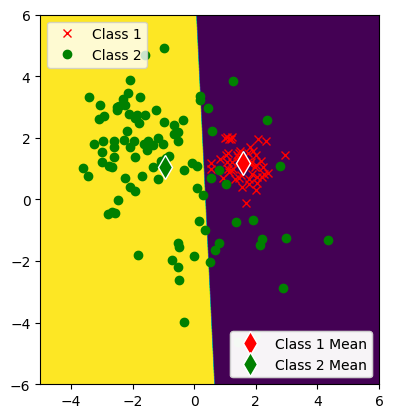

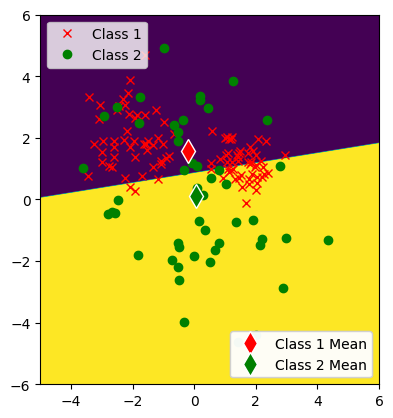

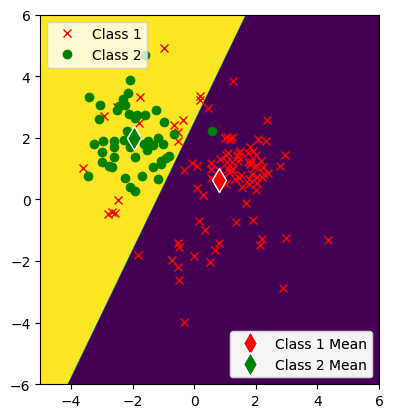

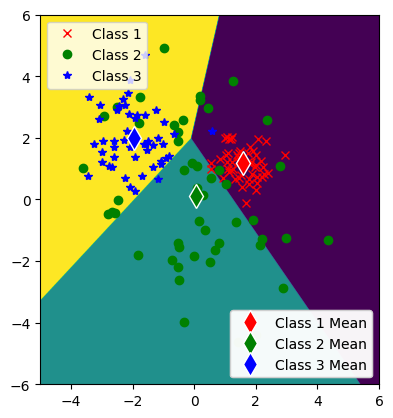

NearestMeansClassifier , Error_Rate: 19.333333333333332
NearestMeansClassifier, Accuracy: 80.66666666666667
NearestMeansClassifier, Unclassified_rate: 0.0


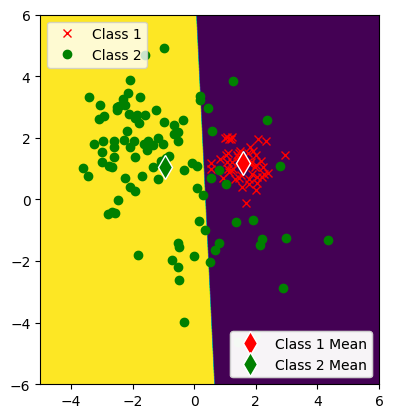

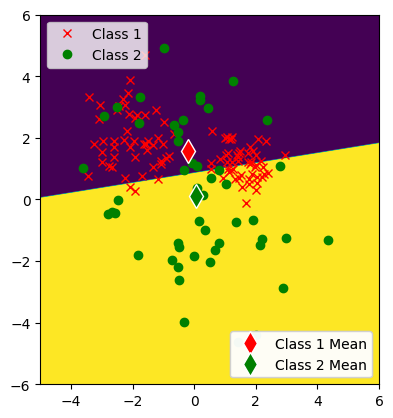

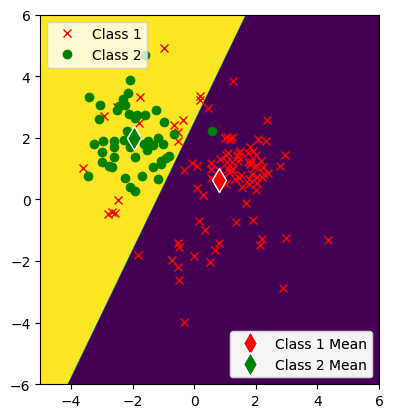

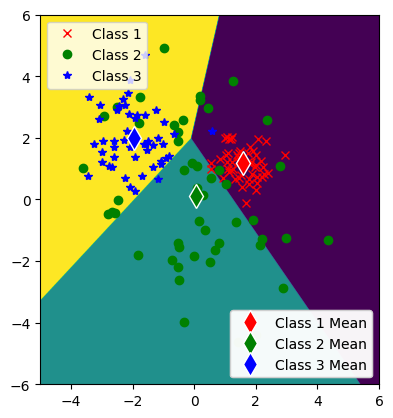

In [64]:
FeatureList = openFile("ee559_dataset/dataset6_train.csv")   #dataset 6
only_data = just_data(FeatureList)
labels, label_one, label_two, label_three = class_labels(FeatureList)
MeanFinal, classes_mean, mean1_1c, mean2_2c, mean3_3c = mean_3class(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_6a, Error_Rate_6a, Unclassified_rate_6a = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_6a)
print("Using default decision rule, Accuracy:", Accuracy_6a)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_6a)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_6b, Error_Rate_6b, Unclassified_rate_6b = calculate_error(FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_6b)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_6b)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_6b)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)
 

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_6c, Error_Rate_6c, Unclassified_rate_6c = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_6c)
print("NearestMeansClassifier, Accuracy:", Accuracy_6c)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_6c)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


(150, 3)
Using default decision rule, Error_Rate: 15.333333333333332
Using default decision rule, Accuracy: 54.66666666666667
Using default decision rule, Unclassified_rate: 30.0


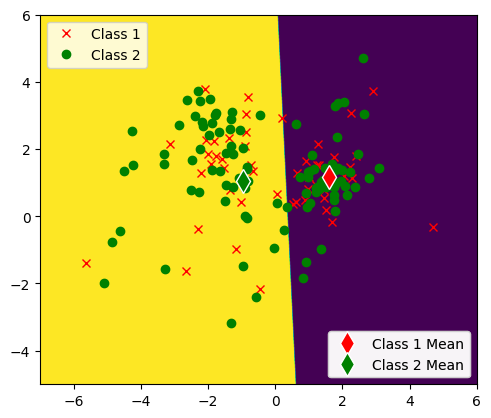

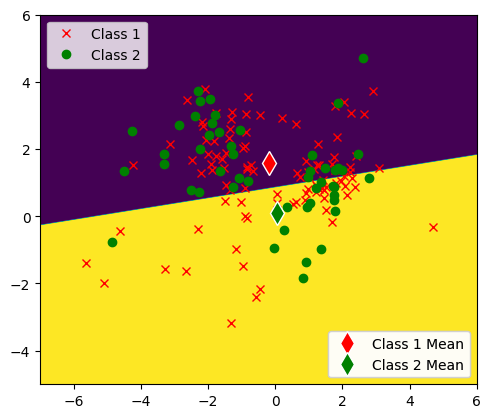

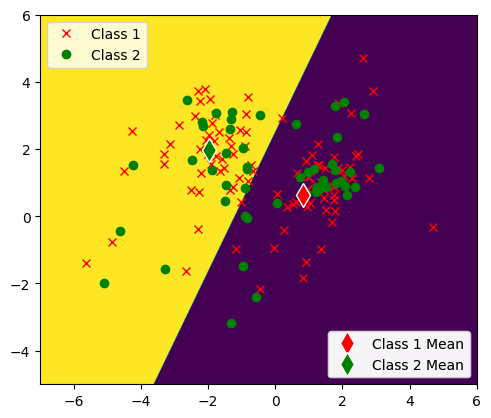

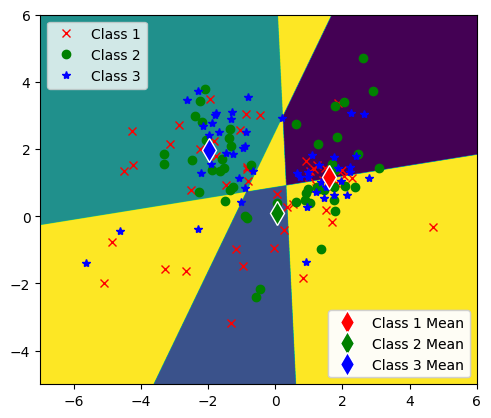

After applying decision rule on unclassified data, Error_Rate: 24.0
After applying decision rule on unclassified data, Accuracy: 76.0
After applying decision rule on unclassified data, Unclassified_rate: 0.0


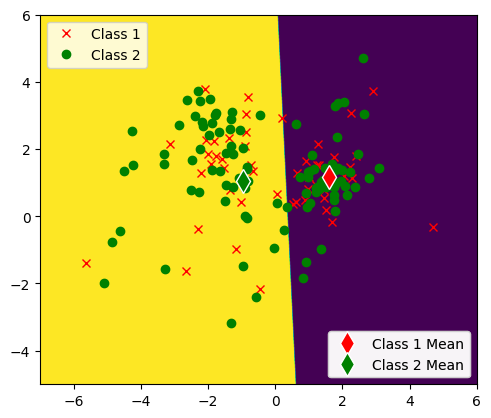

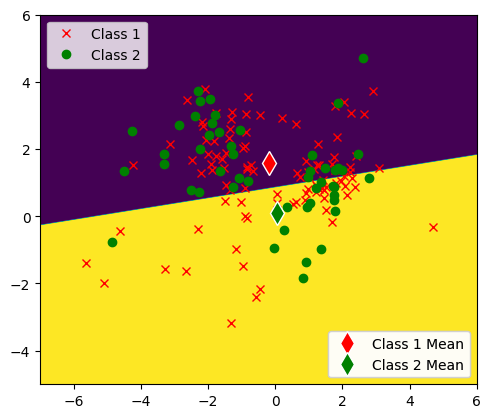

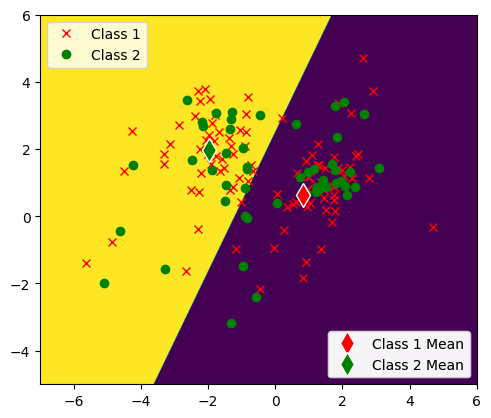

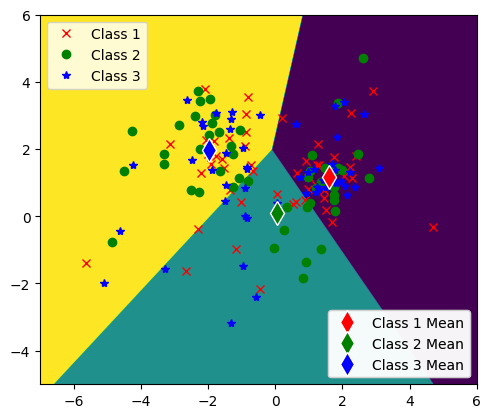

NearestMeansClassifier , Error_Rate: 24.0
NearestMeansClassifier, Accuracy: 76.0
NearestMeansClassifier, Unclassified_rate: 0.0


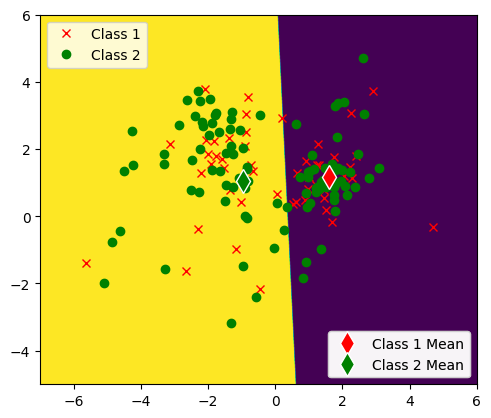

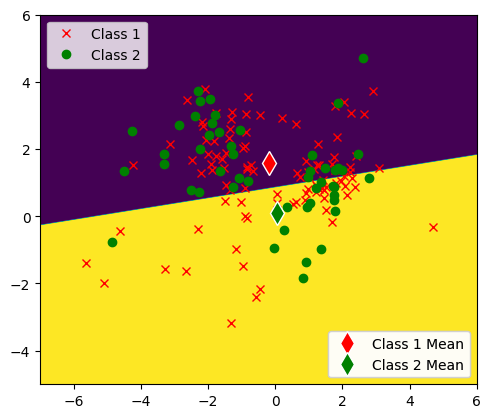

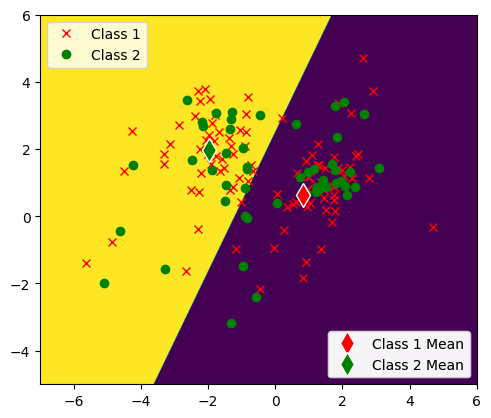

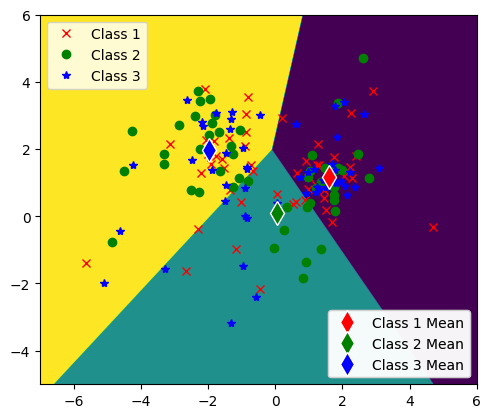

In [65]:
FeatureList = openFile("ee559_dataset/dataset6_test.csv")   #dataset 6-test
only_data = just_data(FeatureList)
#labels, label_one, label_two, label_three = class_labels(FeatureList)
FeatureList = ovr(MeanFinal, FeatureList)
Accuracy_6aT, Error_Rate_6aT, Unclassified_rate_6aT = calculate_error (FeatureList)
print("Using default decision rule, Error_Rate:", Error_Rate_6aT)
print("Using default decision rule, Accuracy:", Accuracy_6aT)
print("Using default decision rule, Unclassified_rate:", Unclassified_rate_6aT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries_OVR(only_data, result2, classes_mean, MeanFinal)

FeatureList = unclassified_decision1(FeatureList, classes_mean)    #part b)
Accuracy_6bT, Error_Rate_6bT, Unclassified_rate_6bT = calculate_error (FeatureList)
print("After applying decision rule on unclassified data, Error_Rate:", Error_Rate_6bT)
print("After applying decision rule on unclassified data, Accuracy:", Accuracy_6bT)
print("After applying decision rule on unclassified data, Unclassified_rate:", Unclassified_rate_6bT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)

FeatureList = nearestMeans(FeatureList, classes_mean)    #part c)
Accuracy_6cT, Error_Rate_6cT, Unclassified_rate_6cT = calculate_error (FeatureList)
print("NearestMeansClassifier , Error_Rate:", Error_Rate_6cT)
print("NearestMeansClassifier, Accuracy:", Accuracy_6cT)
print("NearestMeansClassifier, Unclassified_rate:", Unclassified_rate_6cT)

plotDecBoundaries(only_data,label_one,mean1_1c)    #mean1_1c = class 1 and class(2+3) 
plotDecBoundaries(only_data,label_two,mean2_2c)    #mean2_2c = result 5 is mean of class 2 and class(1+3)
plotDecBoundaries(only_data,label_three,mean3_3c)  #mean3_3c = class 3 and class(1+2) '''
plotDecBoundaries(only_data,labels,classes_mean)


In [67]:
from prettytable import PrettyTable 

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Dataset", "Error Rate", "Accuracy", "Unclassified_rate"]) 

# Add rows
myTable.add_row(["Dataset 4 Train Part a", Error_Rate_4a, Accuracy_4a, Unclassified_rate_4aT]) 
myTable.add_row(["Dataset 4 Train Part b", Error_Rate_4b, Accuracy_4b, Unclassified_rate_4bT])
myTable.add_row(["Dataset 4 Train Part c", Error_Rate_4c, Accuracy_4c, Unclassified_rate_4cT]) 

myTable.add_row(["Dataset 4 Test Part a", Error_Rate_4aT, Accuracy_4aT, Unclassified_rate_4aT]) 
myTable.add_row(["Dataset 4 Test Part b", Error_Rate_4bT, Accuracy_4bT, Unclassified_rate_4bT]) 
myTable.add_row(["Dataset 4 Test Part c", Error_Rate_4cT, Accuracy_4cT, Unclassified_rate_4cT]) 

myTable.add_row(["Dataset 5 Train Part a", Error_Rate_5a, Accuracy_5a, Unclassified_rate_5a]) 
myTable.add_row(["Dataset 5 Train Part b", Error_Rate_5b, Accuracy_5b, Unclassified_rate_5b]) 
myTable.add_row(["Dataset 5 Train Part c", Error_Rate_5c, Accuracy_5c, Unclassified_rate_5c])

myTable.add_row(["Dataset 5 Test Part a", Error_Rate_5aT, Accuracy_5aT, Unclassified_rate_5aT]) 
myTable.add_row(["Dataset 5 Test Part b", Error_Rate_5bT, Accuracy_5bT, Unclassified_rate_5bT]) 
myTable.add_row(["Dataset 5 Test Part c", Error_Rate_5cT, Accuracy_5cT, Unclassified_rate_5cT]) 

myTable.add_row(["Dataset 6 Train Part a", Error_Rate_6a, Accuracy_6a, Unclassified_rate_6a]) 
myTable.add_row(["Dataset 6 Train Part b", Error_Rate_6b, Accuracy_6b, Unclassified_rate_6b])
myTable.add_row(["Dataset 6 Train Part c", Error_Rate_6c, Accuracy_6c, Unclassified_rate_6c]) 

myTable.add_row(["Dataset 6 Test Part a", Error_Rate_6aT, Accuracy_6aT, Unclassified_rate_6aT])
myTable.add_row(["Dataset 6 Test Part b", Error_Rate_6bT, Accuracy_6bT, Unclassified_rate_6bT]) 
myTable.add_row(["Dataset 6 Test Part c", Error_Rate_6cT, Accuracy_6cT, Unclassified_rate_6cT]) 

print(myTable)


+------------------------+--------------------+--------------------+--------------------+
|        Dataset         |     Error Rate     |      Accuracy      | Unclassified_rate  |
+------------------------+--------------------+--------------------+--------------------+
| Dataset 4 Train Part a | 14.000000000000002 |        70.0        |        18.0        |
| Dataset 4 Train Part b | 16.666666666666664 | 83.33333333333334  |        0.0         |
| Dataset 4 Train Part c | 16.666666666666664 | 83.33333333333334  |        0.0         |
| Dataset 4 Test Part a  |        10.0        |        72.0        |        18.0        |
| Dataset 4 Test Part b  | 13.333333333333334 | 86.66666666666667  |        0.0         |
| Dataset 4 Test Part c  | 13.333333333333334 | 86.66666666666667  |        0.0         |
| Dataset 5 Train Part a |        16.0        | 53.333333333333336 | 30.666666666666664 |
| Dataset 5 Train Part b | 35.333333333333336 | 64.66666666666666  |        0.0         |
| Dataset 